In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import ipywidgets as widgets
from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


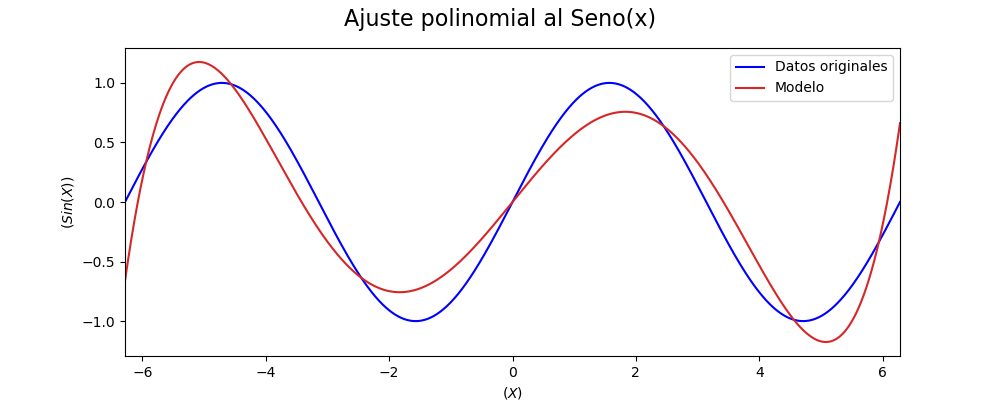

interactive(children=(IntSlider(value=2, description='Grado del polinomio', max=10, min=1, style=SliderStyle(d…

In [185]:
style = {'description_width': 'initial'}
grado = widgets.IntSlider(min=1, max=10, value=2, description = "Grado del polinomio", style = style)
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
fig, ax = plt.subplots(1,figsize=(10,4))
fig.suptitle("Ajuste polinomial al Seno(x)", fontsize=16)


def Polynomial_graph_reg(grado):
    ax.clear()
    
    X = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y = np.sin(X)
    
    #plt.scatter(X,y,label = "Original Data")
    poly_features = PolynomialFeatures(degree=grado, include_bias = False)
    X_poly = poly_features.fit_transform(X[:, np.newaxis])
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y)
    xrange = np.linspace(X.min(),X.max(),m)[:,np.newaxis]
    xrange = poly_features.transform(xrange)
    y_predict = lin_reg.predict(xrange)
    

   
    #plt.plot(X_poly[:,0], y_predict,c="tab:red")
    
    
    ax.plot(X,y,"b-", label = "Datos originales")
    ax.plot(X_poly[:,0], y_predict,c="tab:red",label = "Modelo")
    plt.legend(loc = "upper right")
    
    ax.set_xlabel('$(X)$')
    ax.set_ylabel('$(Sin(X))$')
    ax.set_xlim(X_poly[:,0][0],X_poly[:,0][-1])
    plt.show()



widgets.interactive(Polynomial_graph_reg, grado=grado)
#display(Obs, grado)
